### RoofLine

"We believe that for the recent past and foreseeable future, off-chip memory bandwidth will often be the constraining resource. Hence, we want a model that relates processor performance to off-chip memory traffic"

This was the cricial insight in 2009. Multicore computing was changing the mix of resources.  It became possible to deliver many more flops (in cores) without at all increasing the off-core bandwdith.
 
#### Concepts

The total number of $\mbox{FLOPS}/s$ realized is bounded by either:
  * the amount of data deliver to the process times the operational intensity $(\mbox{GB}/s \cdot \mbox{FLOPS}/\mbox{GB})$
  * the peak processing throughput of the processor
  
Operational intensity is a measure of how many times you use each byte.  Graphically, these bounds look like:

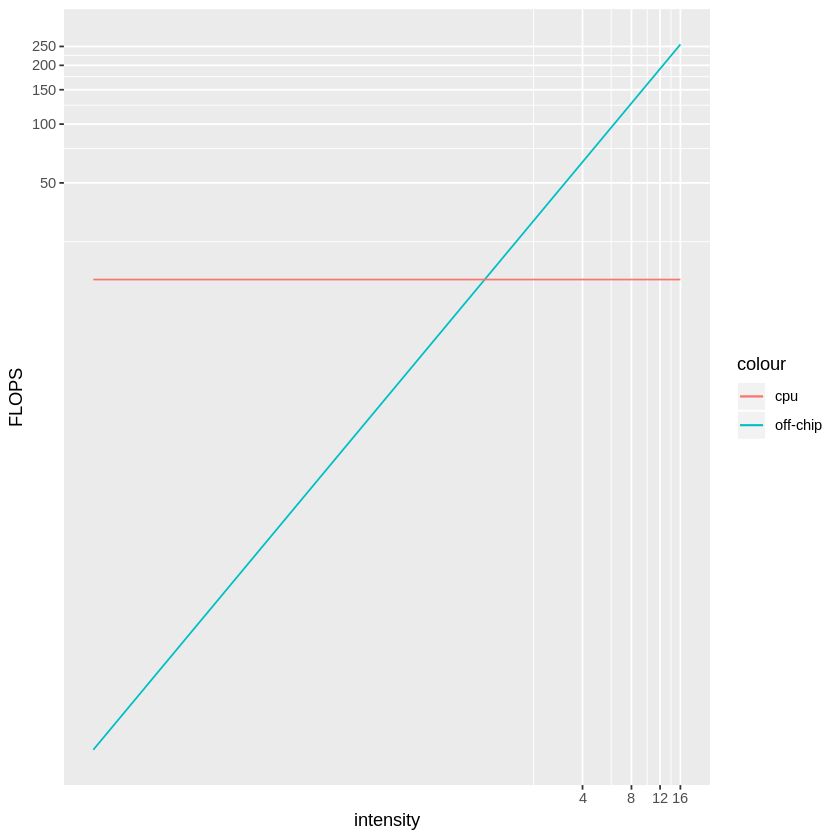

In [28]:
library(ggplot2)

intensity = 2^(-8:4)

offchip = 16 # GB/s
flopsmax = 16 # GFLOPs
        
memband <- data.frame(intensity, intensity * 16, flopsmax )
colnames(memband) <- c("intensity", "FLOPS", 'cpuFLOPS')

 
       
aplot <- ggplot(memband, aes(x=intensity, y=FLOPS, color="off-chip")) + geom_line() +
            geom_line(data=memband, aes(x=intensity, y=cpuFLOPS, color="cpu")) +
            coord_trans(x="log2", y="log2") #+ scale_y_continuous(limits=c(1,50))

print(aplot)


* `off-chip` BW is the amount of data transferred from DRAM to the processor

Taking the minimum of these functions describes the __roofline__.  This is the 
feasible region for a computation:
  * no possible program can exceed the roofline
  * inefficiencies in programs may be less than the roofline

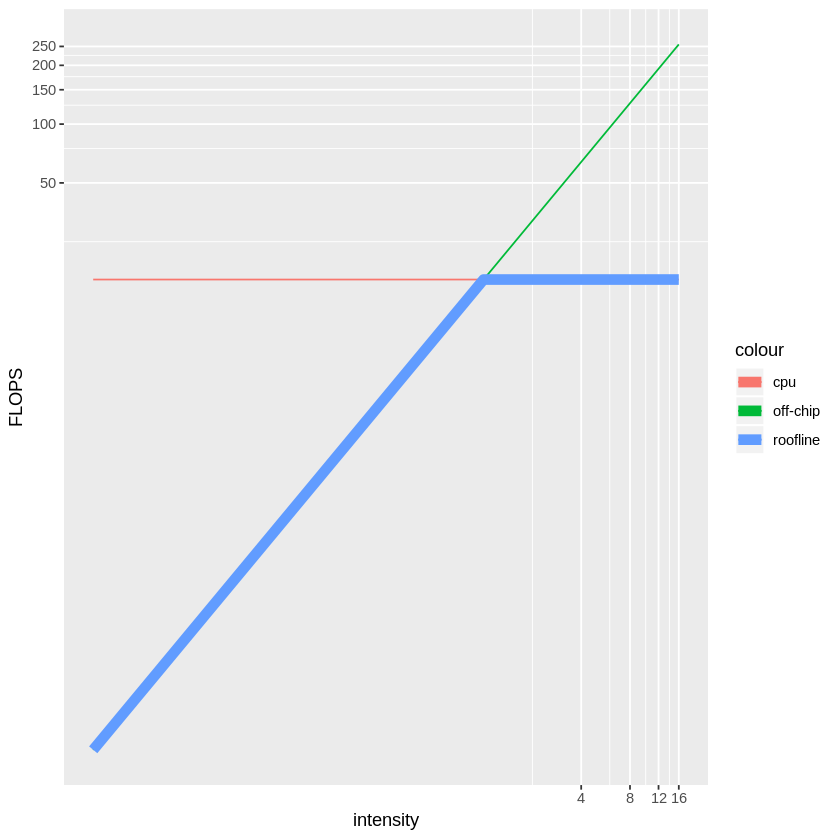

In [31]:
library(ggplot2)

intensity = 2^(-8:4)

offchip = 16 # GB/s
flopsmax = 16 # GFLOPs
        
memband <- data.frame(intensity, intensity * 16, flopsmax, pmin(intensity*16,flopsmax) )
colnames(memband) <- c("intensity", "FLOPS", 'cpuFLOPS', 'Roofline')
       
aplot <- ggplot(memband, aes(x=intensity, y=FLOPS, color="off-chip")) + geom_line() +
            geom_line(data=memband, aes(x=intensity, y=cpuFLOPS, color="cpu")) +
            geom_line(data=memband, aes(x=intensity, y=Roofline, color="roofline"), size=3) +
            coord_trans(x="log2", y="log2") #+ scale_y_continuous(limits=c(1,50))

print(aplot)

#### Kernels

So, the idea is to measure a given programs operational intensity, which will correspond to a vertical line on the plot.  The 

In [33]:
library(ggplot2)

intensity = 2^(-8:4)
offchip = 16 # GB/s
flopsmax = 16 # GFLOPs
lowi = 1.2
highi = 8
        
memband <- data.frame(intensity, pmin(intensity*16,flopsmax) )
colnames(memband) <- c("intensity", "FLOPS")
       
aplot <- ggplot(memband, aes(x=intensity, y=FLOPS, color="Roofline", size=2)) + geom_line() +
         geom_vline(data = lowi, aes(size=2, linetype="dashed")) 

print(aplot)

ERROR: Error: `data` must be a data frame, or other object coercible by `fortify()`, not a numeric vector


### Relationship with GPU